In [62]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

'''使用K-Means算法聚类气象特征数据'''

inputfile = './data/第2问-数据.xlsx'  # 输入数据

outputfile = './data/第2问-聚类.xlsx'  # 保存结果的文件名

outputfile_statistics = './data/第2问-聚类统计.xlsx'

k = 6  # 聚类的类别

iteration = 500  # 聚类最大循环次数

df = pd.read_excel(inputfile)  # 读取数据

# 数据预处理
df = df.drop(columns=['top_pollutant', 'AQI'])
df = df.iloc[:, 2:]

df_zs = 1.0*(df - df.mean())/df.std()  # 数据标准化

model = KMeans(n_clusters=k, max_iter=iteration)  # 分为 k 类, 并发数 4

model.fit(df_zs)  # 开始聚类

r1 = pd.Series(model.labels_).value_counts()  # 统计各个类别的数目

r2 = pd.DataFrame(model.cluster_centers_)  # 找出聚类中心

# r2 = r2*(df.std().values) + (df.mean().values)

r = pd.concat([r2, r1], axis=1)  # 横向连接(0是纵向), 得到聚类中心对应的类别下的数目

r.columns = list(df.columns) + [u'类别数目']  # 重命名表头

# print(r)

# 详细输出原始数据及其类别
r = pd.concat([df, pd.Series(model.labels_, index=df.index)], axis=1)

# 详细输出每个样本对应的类别
r.columns = list(df.columns) + [u'聚类类别']  # 重命名表头

# 保存统计结果
result_list = []

# 统计每个类别下气象条件（最大值，最小值，均值）
for category in range(k):
    r_category = r[r[u'聚类类别'] == category]
    max_SO2, min_SO2, avg_SO2 = r_category['SO2'].max(
    ), r_category['SO2'].min(), np.around(r_category['SO2'].mean(), 2)
    max_NO2, min_NO2, avg_NO2 = r_category['NO2'].max(
    ), r_category['NO2'].min(), np.around(r_category['NO2'].mean(), 2)
    max_PM10, min_PM10, avg_PM10 = r_category['PM10'].max(
    ), r_category['PM10'].min(), np.around(r_category['PM10'].mean(), 2)
    max_PM25, min_PM25, avg_PM25 = r_category['PM2.5'].max(
    ), r_category['PM2.5'].min(), np.around(r_category['PM2.5'].mean(), 2)
    max_O3, min_O3, avg_O3 = r_category['O3'].max(
    ), r_category['O3'].min(), np.around(r_category['O3'].mean(), 2)
    max_CO, min_CO, avg_CO = r_category['CO'].max(
    ), r_category['CO'].min(), np.around(r_category['CO'].mean(), 2)
    max_temp, min_temp, avg_temp = r_category['temperature'].max(
    ), r_category['temperature'].min(), np.around(r_category['temperature'].mean(), 2)
    max_hum, min_hum, avg_hum = r_category['humidity'].max(
    ), r_category['humidity'].min(), np.around(r_category['humidity'].mean(), 2)
    max_air_press, min_air_press, avg_air_press = r_category['air_pressure'].max(
    ), r_category['air_pressure'].min(), np.around(r_category['air_pressure'].mean(), 2)
    max_wind_speed, min_wind_speed, avg_wind_speed = r_category['wind_speed'].max(
    ), r_category['wind_speed'].min(), np.around(r_category['wind_speed'].mean(), 2)
    max_wind_direct, min_win_direct, avg_win_direct = r_category['wind_direction'].max(
    ), r_category['wind_direction'].min(), np.around(r_category['wind_direction'].mean(), 2)
    result = [
        category, max_SO2, min_SO2, avg_SO2,
        max_NO2, min_NO2, avg_NO2,
        max_PM10, min_PM10, avg_PM10,
        max_PM25, min_PM25, avg_PM25,
        max_O3, min_O3, avg_O3,
        max_CO, min_CO, avg_CO,
        max_temp, min_temp, avg_temp,
        max_hum, min_hum, avg_hum,
        max_air_press, min_air_press, avg_air_press,
        max_wind_speed, min_wind_speed, avg_wind_speed,
        max_wind_direct, min_win_direct, avg_win_direct
    ]
    result_list.append(result)

result_list_np = np.array(result_list)  # 将 python 列表数据转换为 numpy 数组
columns = [
    '聚类类别',
    'SO2（最大值）', 'SO2（最小值）', 'SO2（平均值）',
    'NO2（最大值）', 'NO2（最小值）', 'NO2（平均值）',
    'PM10（最大值）', 'PM10（最小值）', 'PM10（平均值）',
    'PM2.5（最大值）', 'PM2.5（最小值）', 'PM2.5（平均值）',
    'O3（最大值）', 'O3（最小值）', 'O3（平均值）',
    'CO（最大值）', 'CO（最小值）', 'CO（平均值）',
    '温度（最大值）', '温度（最小值）', '温度（平均值）',
    '湿度（最大值）', '湿度（最小值）', '湿度（平均值）',
    '气压（最大值）', '气压（最小值）', '气压（平均值）',
    '风速（最大值）', '风速（最小值）', '风速（平均值）',
    '风向（最大值）', '风向（最小值）', '风向（平均值）',
]
df_s = pd.DataFrame(result_list_np)
df_s.columns = columns
df_s.to_excel(outputfile_statistics)  # 保存统计结果

r.to_excel(outputfile)  # 保存原始数据和分类结果

<Figure size 432x288 with 0 Axes>

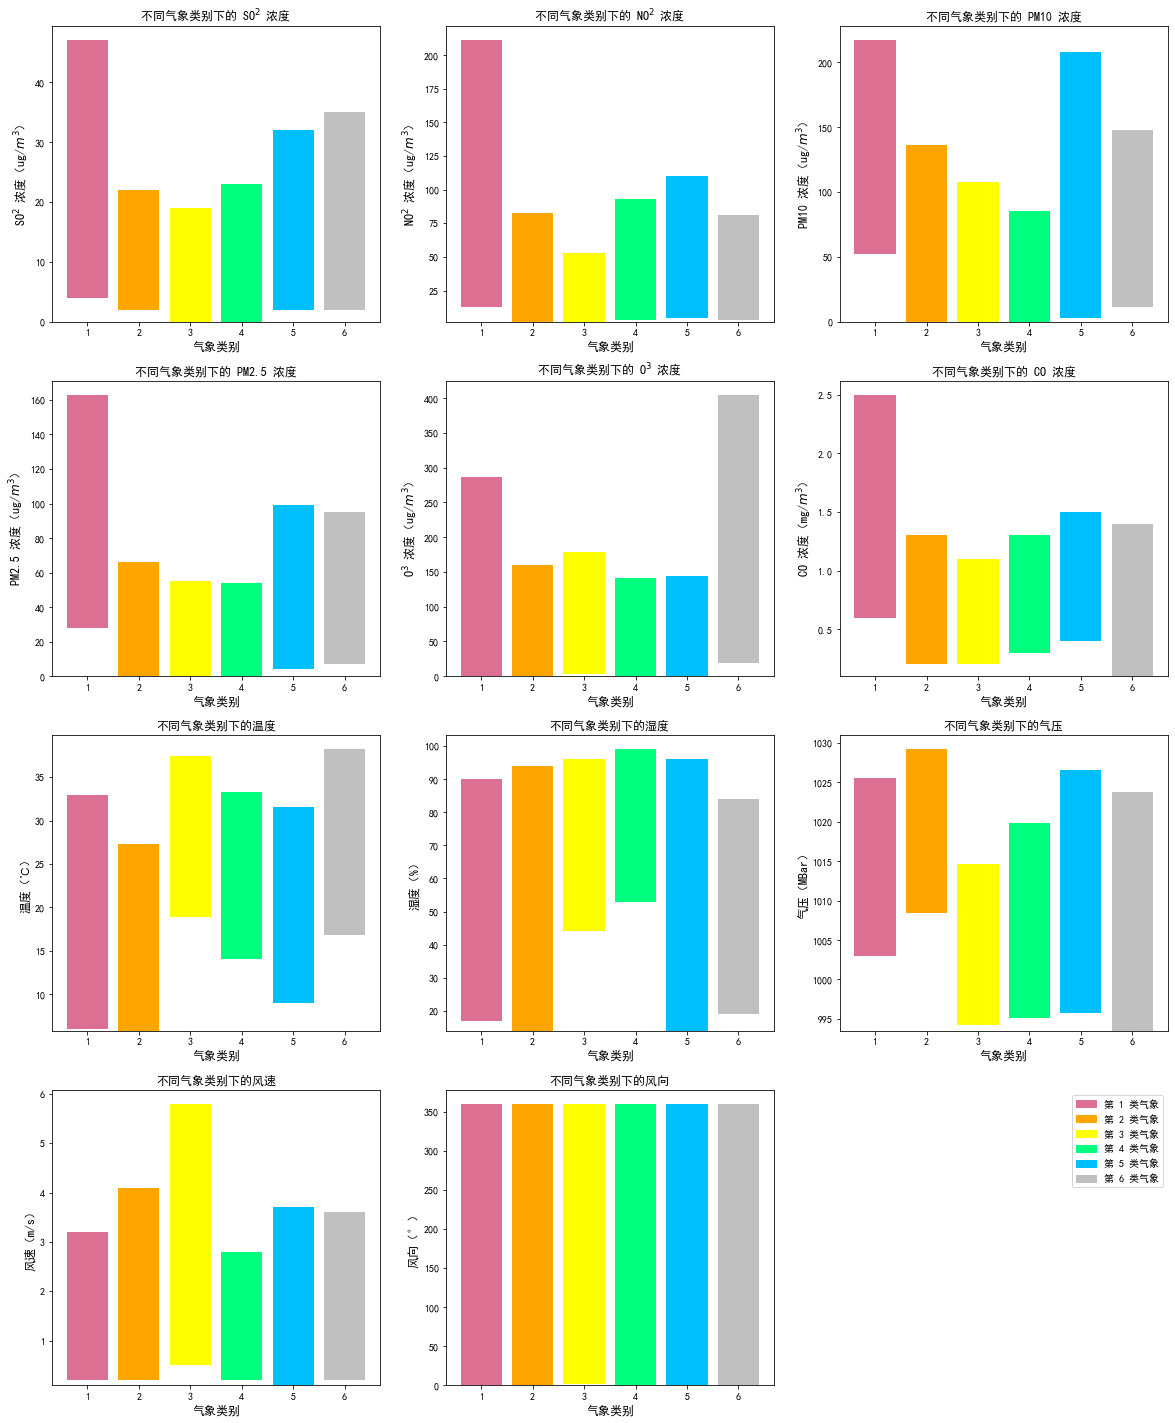

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes

# 设置图形字体为 SimHei，显示中文（否则图形显示的时候中文会乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False
# 设置 subplots 的边距
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)

# 读取数据
df_original = pd.read_excel('./data/第2问-聚类统计.xlsx')

df = df_original.iloc[:, 2:]  # 去掉前两列数据
df_val = df.values  # 获取表格具体数值

# 获取各污染物的最大值和最小值
max_SO2 = df_val[:, :1].reshape(-1)
min_SO2 = df_val[:, 1:2].reshape(-1)

max_NO2 = df_val[:, 3:4].reshape(-1)
min_NO2 = df_val[:, 4:5].reshape(-1)

max_PM10 = df_val[:, 6:7].reshape(-1)
min_PM10 = df_val[:, 7:8].reshape(-1)

max_PM25 = df_val[:, 9:10].reshape(-1)
min_PM25 = df_val[:, 10:11].reshape(-1)

max_O3 = df_val[:, 12:13].reshape(-1)
min_O3 = df_val[:, 13:14].reshape(-1)

max_CO = df_val[:, 15:16].reshape(-1)
min_CO = df_val[:, 16:17].reshape(-1)

# 获取各类气象条件的最大值和最小值
max_temp = df_val[:, 18:19].reshape(-1)
min_temp = df_val[:, 19:20].reshape(-1)

max_hum = df_val[:, 21:22].reshape(-1)
min_hum = df_val[:, 22:23].reshape(-1)

max_air_press = df_val[:, 24:25].reshape(-1)
min_air_press = df_val[:, 25:26].reshape(-1)

max_wind_speed = df_val[:, 27:28].reshape(-1)
min_wind_speed = df_val[:, 28:29].reshape(-1)

max_wind_direct = df_val[:, 30:31].reshape(-1)
min_win_direct = df_val[:, 31:32].reshape(-1)

'''绘制柱状图'''
fig, axs = plt.subplots(4, 3, figsize=(20, 25))

x = [i + 1 for i in range(6)]

axs[0, 0].bar(
    x=x,
    height=max_SO2 - min_SO2,
    bottom=min_SO2,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[0, 0].set_xlabel('气象类别', fontsize=12)
axs[0, 0].set_ylabel('SO$^{2}$ 浓度（ug/$m^{3}$）', fontsize=12)
axs[0, 0].set_title('不同气象类别下的 SO$^{2}$ 浓度', fontsize=12)

axs[0, 1].bar(
    x=x,
    height=max_NO2 - min_NO2,
    bottom=min_NO2,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[0, 1].set_xlabel('气象类别', fontsize=12)
axs[0, 1].set_ylabel('NO$^{2}$ 浓度（ug/$m^{3}$）', fontsize=12)
axs[0, 1].set_title('不同气象类别下的 NO$^{2}$ 浓度', fontsize=12)

axs[0, 2].bar(
    x=x,
    height=max_PM10 - min_PM10,
    bottom=min_PM10,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[0, 2].set_xlabel('气象类别', fontsize=12)
axs[0, 2].set_ylabel('PM10 浓度（ug/$m^{3}$）', fontsize=12)
axs[0, 2].set_title('不同气象类别下的 PM10 浓度', fontsize=12)

axs[1, 0].bar(
    x=x,
    height=max_PM25 - min_PM25,
    bottom=min_PM25,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[1, 0].set_xlabel('气象类别', fontsize=12)
axs[1, 0].set_ylabel('PM2.5 浓度（ug/$m^{3}$）', fontsize=12)
axs[1, 0].set_title('不同气象类别下的 PM2.5 浓度', fontsize=12)

axs[1, 1].bar(
    x=x,
    height=max_O3 - min_O3,
    bottom=min_O3,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[1, 1].set_xlabel('气象类别', fontsize=12)
axs[1, 1].set_ylabel('O$^{3}$ 浓度（ug/$m^{3}$）', fontsize=12)
axs[1, 1].set_title('不同气象类别下的 O$^{3}$ 浓度', fontsize=12)

axs[1, 2].bar(
    x=x,
    height=max_CO - min_CO,
    bottom=min_CO,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[1, 2].set_xlabel('气象类别', fontsize=12)
axs[1, 2].set_ylabel('CO 浓度（mg/$m^{3}$）', fontsize=12)
axs[1, 2].set_title('不同气象类别下的 CO 浓度', fontsize=12)

axs[2, 0].bar(
    x=x,
    height=max_temp - min_temp,
    bottom=min_temp,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[2, 0].set_xlabel('气象类别', fontsize=12)
axs[2, 0].set_ylabel('温度（℃）', fontsize=12)
axs[2, 0].set_title('不同气象类别下的温度', fontsize=12)

axs[2, 1].bar(
    x=x,
    height=max_hum - min_hum,
    bottom=min_hum,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[2, 1].set_xlabel('气象类别', fontsize=12)
axs[2, 1].set_ylabel('湿度（%）', fontsize=12)
axs[2, 1].set_title('不同气象类别下的湿度', fontsize=12)

axs[2, 2].bar(
    x=x,
    height=max_air_press - min_air_press,
    bottom=min_air_press,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[2, 2].set_xlabel('气象类别', fontsize=12)
axs[2, 2].set_ylabel('气压（MBar）', fontsize=12)
axs[2, 2].set_title('不同气象类别下的气压', fontsize=12)

axs[3, 0].bar(
    x=x,
    height=max_wind_speed - min_wind_speed,
    bottom=min_wind_speed,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[3, 0].set_xlabel('气象类别', fontsize=12)
axs[3, 0].set_ylabel('风速（m/s）', fontsize=12)
axs[3, 0].set_title('不同气象类别下的风速', fontsize=12)

axs[3, 1].bar(
    x=x,
    height=max_wind_direct - min_win_direct,
    bottom=min_win_direct,
    color=['#DB7093', '#FFA500', '#FFFF00', '#00FF7F', '#00BFFF', '#C0C0C0'],
)
axs[3, 1].set_xlabel('气象类别', fontsize=12)
axs[3, 1].set_ylabel('风向（°）', fontsize=12)
axs[3, 1].set_title('不同气象类别下的风向', fontsize=12)

# 不显示最后一个子图
axs[3, 2].xaxis.set_ticks([])
axs[3, 2].yaxis.set_ticks([])
axs[3, 2].spines['top'].set_visible(False)
axs[3, 2].spines['right'].set_visible(False)
axs[3, 2].spines['bottom'].set_visible(False)
axs[3, 2].spines['left'].set_visible(False)

first_patch = mpathes.Patch(color='#DB7093', label='第 1 类气象')
second_patch = mpathes.Patch(color='#FFA500', label='第 2 类气象')
third_patch = mpathes.Patch(color='#FFFF00', label='第 3 类气象')
forth_patch = mpathes.Patch(color='#00FF7F', label='第 4 类气象')
fifth_patch = mpathes.Patch(color='#00BFFF', label='第 5 类气象')
sixth_patch = mpathes.Patch(color='#C0C0C0', label='第 6 类气象')
plt.legend(handles=[first_patch, second_patch, third_patch,
           forth_patch, fifth_patch, sixth_patch], loc='best')
